In [1]:
# SARIMAX avec lag features

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
uber = pd.read_csv('../uber_data.csv', parse_dates= True)

In [5]:
uber.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [6]:
uber = uber.dropna()

In [7]:
manhattan = uber[uber['borough'] == 'Manhattan']
manhattan

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
10,2015-01-01 02:00:00,Manhattan,4345,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
17,2015-01-01 03:00:00,Manhattan,4577,5.0,10.0,30.0,8.0,1022.3,0.0,0.0,0.0,0.0,Y
24,2015-01-01 04:00:00,Manhattan,3003,5.0,10.0,29.0,9.0,1022.0,0.0,0.0,0.0,0.0,Y
31,2015-01-01 05:00:00,Manhattan,1313,5.0,10.0,28.0,9.0,1021.8,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29071,2015-06-30 19:00:00,Manhattan,4585,5.0,10.0,80.0,58.0,1012.5,0.0,0.0,0.0,0.0,N
29078,2015-06-30 20:00:00,Manhattan,4210,8.0,10.0,80.0,58.0,1012.4,0.0,0.0,0.0,0.0,N
29085,2015-06-30 21:00:00,Manhattan,4313,7.0,10.0,76.0,61.0,1012.4,0.0,0.0,0.0,0.0,N
29091,2015-06-30 22:00:00,Manhattan,4452,5.0,10.0,76.0,64.0,1011.9,0.0,0.0,0.0,0.0,N


In [8]:
manhattan = manhattan.set_index('pickup_dt', drop=True)

In [9]:
manhattan = manhattan.drop('hday', axis=1)

In [10]:
manhattan = manhattan.drop('borough', axis=1)

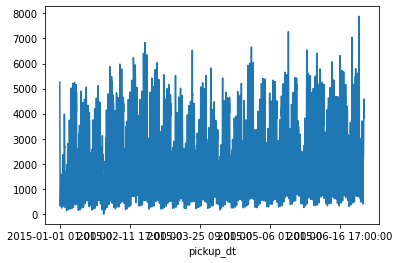

In [11]:
manhattan['pickups'].plot()

In [12]:
#lag features
for i in [1,2,3,4,24,7*24]:
    manhattan[f'lag_{i}'] = manhattan.pickups.shift(i)

In [14]:
#donne le prix du jour d'apres car cela va etre le prix à prédire 
steps = -1
manhattan['actual'] = manhattan['pickups'].shift(steps)
manhattan.head(3)

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,lag_1,lag_2,lag_3,lag_4,lag_24,lag_168,actual
pickup_dt,,,,,,,,,,,,,,,,,
2015-01-01 01:00:00,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4345.0
2015-01-01 02:00:00,4345,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,5258.0,NaN,NaN,NaN,NaN,NaN,4577.0
2015-01-01 03:00:00,4577,5.0,10.0,30.0,8.0,1022.3,0.0,0.0,0.0,0.0,4345.0,5258.0,NaN,NaN,NaN,NaN,3003.0


In [19]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0,1))
scaled_input = sc_in.fit_transform(manhattan[['pickups','temp','lag_1','lag_2','lag_3','lag_4','lag_24','lag_168']])
scaled_input= pd.DataFrame(scaled_input)
X = scaled_input
X.rename(columns={0:'pickups',1:'temp',2:'lag_1',3:'lag_2',4:'lag_3',5:'lag_4',6:'lag_24',7:'lag_168'}, inplace = True)
X

,pickups,temp,lag_1,lag_2,lag_3,lag_4,lag_24,lag_168
0,0.667005,0.321839,NaN,NaN,NaN,NaN,NaN,NaN
1,0.551186,0.321839,0.667005,NaN,NaN,NaN,NaN,NaN
2,0.580617,0.321839,0.551186,0.667005,NaN,NaN,NaN,NaN
3,0.380946,0.310345,0.580617,0.551186,0.667005,NaN,NaN,NaN
4,0.166561,0.298851,0.380946,0.580617,0.551186,0.667005,NaN,NaN
...,...,...,...,...,...,...,...,...
4338,0.581631,0.896552,0.545224,0.454903,0.371559,0.326906,0.470887,0.969055
4339,0.534061,0.896552,0.581631,0.545224,0.454903,0.371559,0.420779,0.790400
4340,0.547127,0.850575,0.534061,0.581631,0.545224,0.454903,0.423697,0.637326
4341,0.564760,0.850575,0.547127,0.534061,0.581631,0.545224,0.420779,0.625223


In [20]:
sc_out = MinMaxScaler(feature_range=(0,1))
scaler_output = sc_out.fit_transform(manhattan[['actual']])
scaler_output = pd.DataFrame(scaler_output)
y = scaler_output
y.rename(columns={0:'pickups_hour_after'}, inplace = True)
y

,pickups_hour_after
0,0.551186
1,0.580617
2,0.380946
3,0.166561
4,0.085247
...,...
4338,0.534061
4339,0.547127
4340,0.564760
4341,0.485602


In [57]:
train_size = int(len(manhattan)*0.7)
test_size = int(len(manhattan)) - train_size

X_train, y_train = X[:train_size].dropna().reset_index(drop=True), y[168:train_size].dropna().reset_index(drop=True)
X_test, y_test = X[train_size:].dropna(), y[train_size:].dropna()

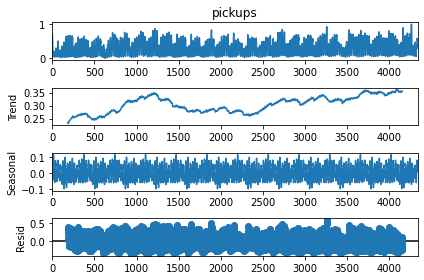

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(X['pickups'], model= 'add', period=365)

fig = sd.plot()
fig.set_figheight(4)
plt.show()

In [60]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [61]:
test = y['pickups_hour_after'][:train_size].dropna()
test_adf(test,'pickups')

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary pickups


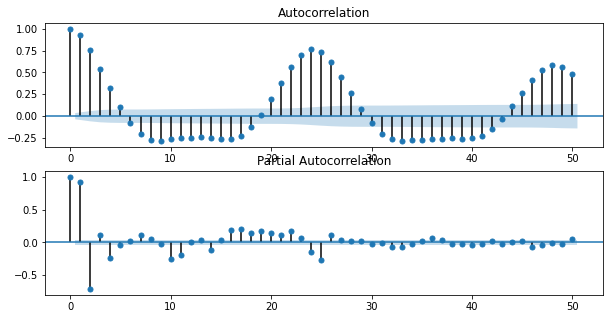

In [62]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(test, lags=50, ax=ax[1])
plt.show()

In [63]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(y_train, 
 exogenous= X_train,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9556.060, Time=5.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9515.852, Time=1.47 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9518.085, Time=4.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9554.540, Time=5.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9517.851, Time=1.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9622.347, Time=5.55 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9592.469, Time=5.67 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-9676.779, Time=7.60 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-9682.491, Time=7.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-9663.284, Time=9.18 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-9685.401, Time=10.16 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-9797.437, Time=10.99 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-9795.029, Time=9.85 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-9797.002, Time=13.01 sec
 ARIMA(5,1,2)(0,

In [64]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2872
Model:               SARIMAX(7, 1, 0)   Log Likelihood                4951.180
Date:                Sat, 17 Oct 2020   AIC                          -9870.361
Time:                        15:22:34   BIC                          -9774.962
Sample:                             0   HQIC                         -9835.969
                               - 2872                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pickups        0.1779      0.051      3.471      0.001       0.077       0.278
temp           0.2532      0.046      5.511      0.000       0.163       0.343
lag_1         -0.1338      0.053     -2.510      0.012      -0.238      -0.029
lag_2          0.2816      0.043      6.618      0.000       0.198       0.365
lag_3         -0.0599      0.043     -1.389      0.165      -0.145       0.025
lag_4         -0.3519      0.037     -9.466      0.000      -0.425      -0.279
lag_24         0.1925      0.018     10.898      0.000       0.158       0.227
lag_168        0.2120      0.019     11.038      0.000       0.174       0.250
ar.L1          0.2966      0.053      5.604      0.000       0.193       0.400
ar.L2         -0.1046      0.054     -1.932      0.053      -0.211       0.002
ar.L3         -0.2020      0.044     -4.569      0.000      -0.289      -0.115
ar.L4          0.0101      0.033      0.308      0.758      -0.054       0.075
ar.L5          0.2777      0.027     10.411      0.000       0.225       0.330
ar.L6         -0.1714      0.032     -5.318      0.000      -0.235      -0.108
ar.L7         -0.1483      0.033     -4.519      0.000      -0.213      -0.084
sigma2         0.0019   3.74e-05     49.735      0.000       0.002       0.002
===================================================================================
Ljung-Box (Q):                      877.04   Jarque-Bera (JB):              2137.79
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.24
Prob(H) (two-sided):                  0.29   Kurtosis:                         7.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(y_train, 
 exog=X_train,
 order=(7,1,0),
 enforce_invertibility=False, enforce_stationarity=False)

In [67]:
#le nombre d'iteration est de 50 par default ce qui empeche le maximum likehood optimization de converger
#pour résoudre le problème de converger on augment le parametre maxiter de la methode fit
#ca diminue legerement notre erreur :  de 27.15 -> 27.14
results = model.fit(maxiter = 200)

In [40]:
results.mle_retvals

{'fopt': -1.721281843949021,
 'gopt': array([ 0.00099068,  0.00026682,  0.00157905,  0.00183311, -0.00016457,
         0.00098642, -0.00084287,  0.00133108,  0.0009694 ,  0.00203444,
         0.00166748, -0.00096396, -0.00182202,  0.00025331,  0.00098682,
        -0.01160804]),
 'fcalls': 2040,
 'warnflag': 1,
 'converged': False,
 'iterations': 100}

In [84]:
(train_size+test_size+(steps))-train_size

1302

In [79]:
predictions= results.predict(start =train_size, end=train_size+test_size+(steps),exog=X_test)

ValueError: Provided exogenous values are not of the appropriate shape. Required (1472, 8), got (1303, 8).

In [179]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])

In [180]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=X_test.index
predictions['actual'] = act['pickups_hour_after']
predictions.rename(columns={0:'Pred'}, inplace=True)
predictions

,Pred,actual
3040,0.543607,0.599899
3041,0.578579,0.676900
3042,0.604409,0.577572
3043,0.522686,0.617531
3044,0.537087,0.673855
...,...,...
4338,0.493193,0.534061
4339,0.462004,0.547127
4340,0.469399,0.564760
4341,0.480959,0.485602


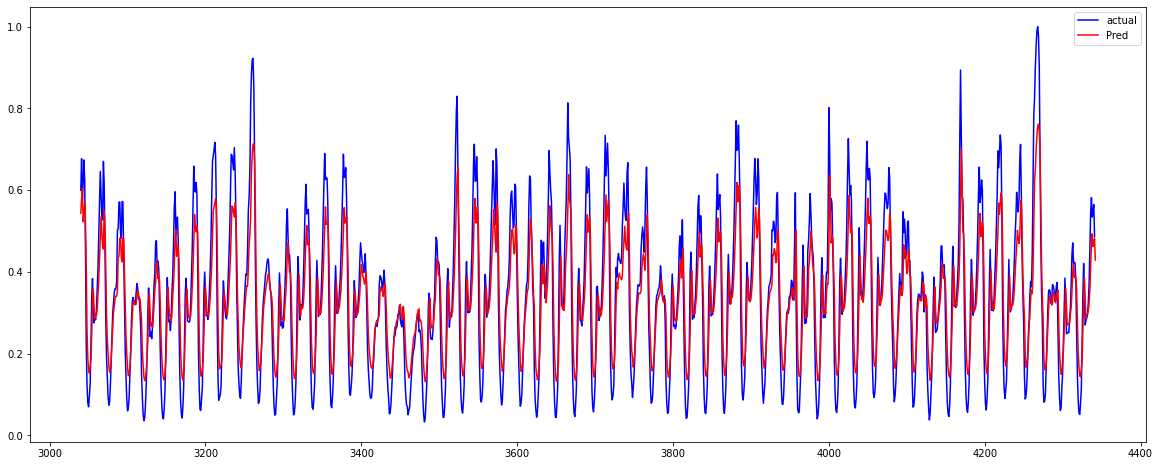

In [181]:
predictions['actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

In [85]:
forecast= results.forecast(steps=test_size, exog=X_test)

In [86]:
forecast= pd.DataFrame(forecast)
forecast.reset_index(drop=True, inplace=True)
forecast.index=X_test.index
forecast['actual'] =scaler_output.iloc[train_size:, 0]
forecast.rename(columns={0:'Forecast'}, inplace=True)

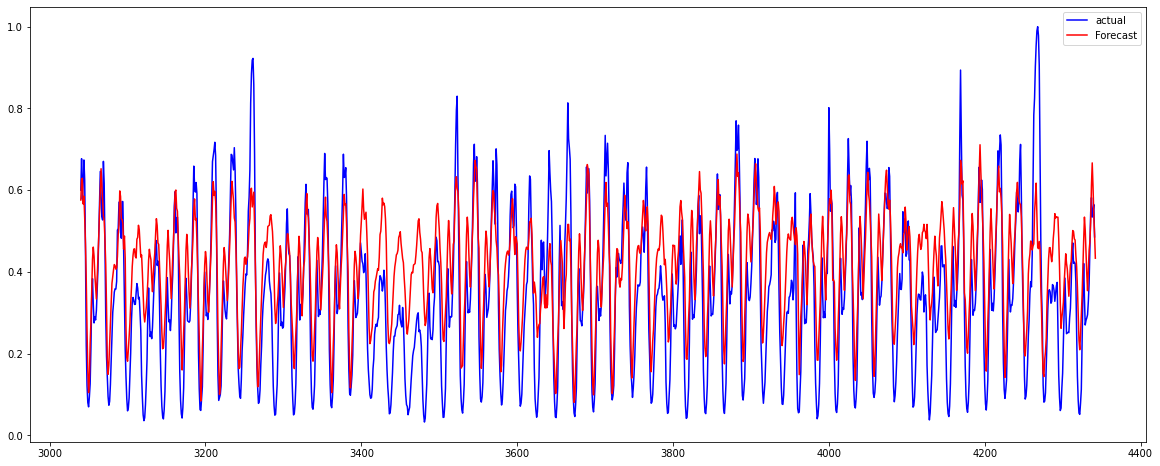

In [87]:
forecast['actual'].plot(figsize=(20,8), legend=True, color='blue')
forecast['Forecast'].plot(legend=True, color='red', figsize=(20,8))

In [89]:
trainPredict = sc_out.inverse_transform(forecast[['Forecast']])
testPredict = sc_out.inverse_transform(forecast[['actual']])

In [90]:
def smape_perso(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [91]:
evaluating = smape_perso(trainPredict[:-1], testPredict[:-1])
evaluating

37.37341629377394